<a href="https://colab.research.google.com/github/002001/ITB2022/blob/main/%EB%B6%84%EB%A5%98%EA%B3%BC%EC%A0%9C_1915041_%EC%95%88%EC%98%88%EC%A7%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**데이터 불러오기** 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#폰트 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import time
import random
import math
import scipy as sp
import statsmodels.api as sm
import requests
from bs4 import BeautifulSoup
import matplotlib as mpl
import matplotlib.pylab as plb
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rc('font', family='NanumBarunGothic') 
mpl.rc('axes', unicode_minus=False)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [4]:
#데이터 파일 불러오기
df=pd.read_csv('/content/drive/MyDrive/ColabNotebooks/ITB/health_data.csv', encoding='utf-8')

# **#데이터 전처리**

In [5]:
#결측치수 확인
display(df.isna().sum())

가입자일련번호           0
기준년도              0
시도코드              0
성별코드              0
연령대코드(5세단위)       0
신장(5Cm단위)         0
체중(5Kg 단위)        0
허리둘레              0
시력(좌)             0
시력(우)             0
청력(좌)             0
청력(우)             0
수축기혈압            88
이완기혈압            88
식전혈당(공복혈당)       88
총콜레스테롤         5956
트리글리세라이드       5956
HDL콜레스테롤       5956
LDL콜레스테롤       6023
혈색소              88
요단백             139
혈청크레아티닌          88
(혈청지오티)AST       88
(혈청지오티)ALT       88
감마지티피            88
흡연상태              2
음주여부              1
구강검진수검여부          0
치아우식증유무        6749
치석             6749
데이터공개일자           0
dtype: int64

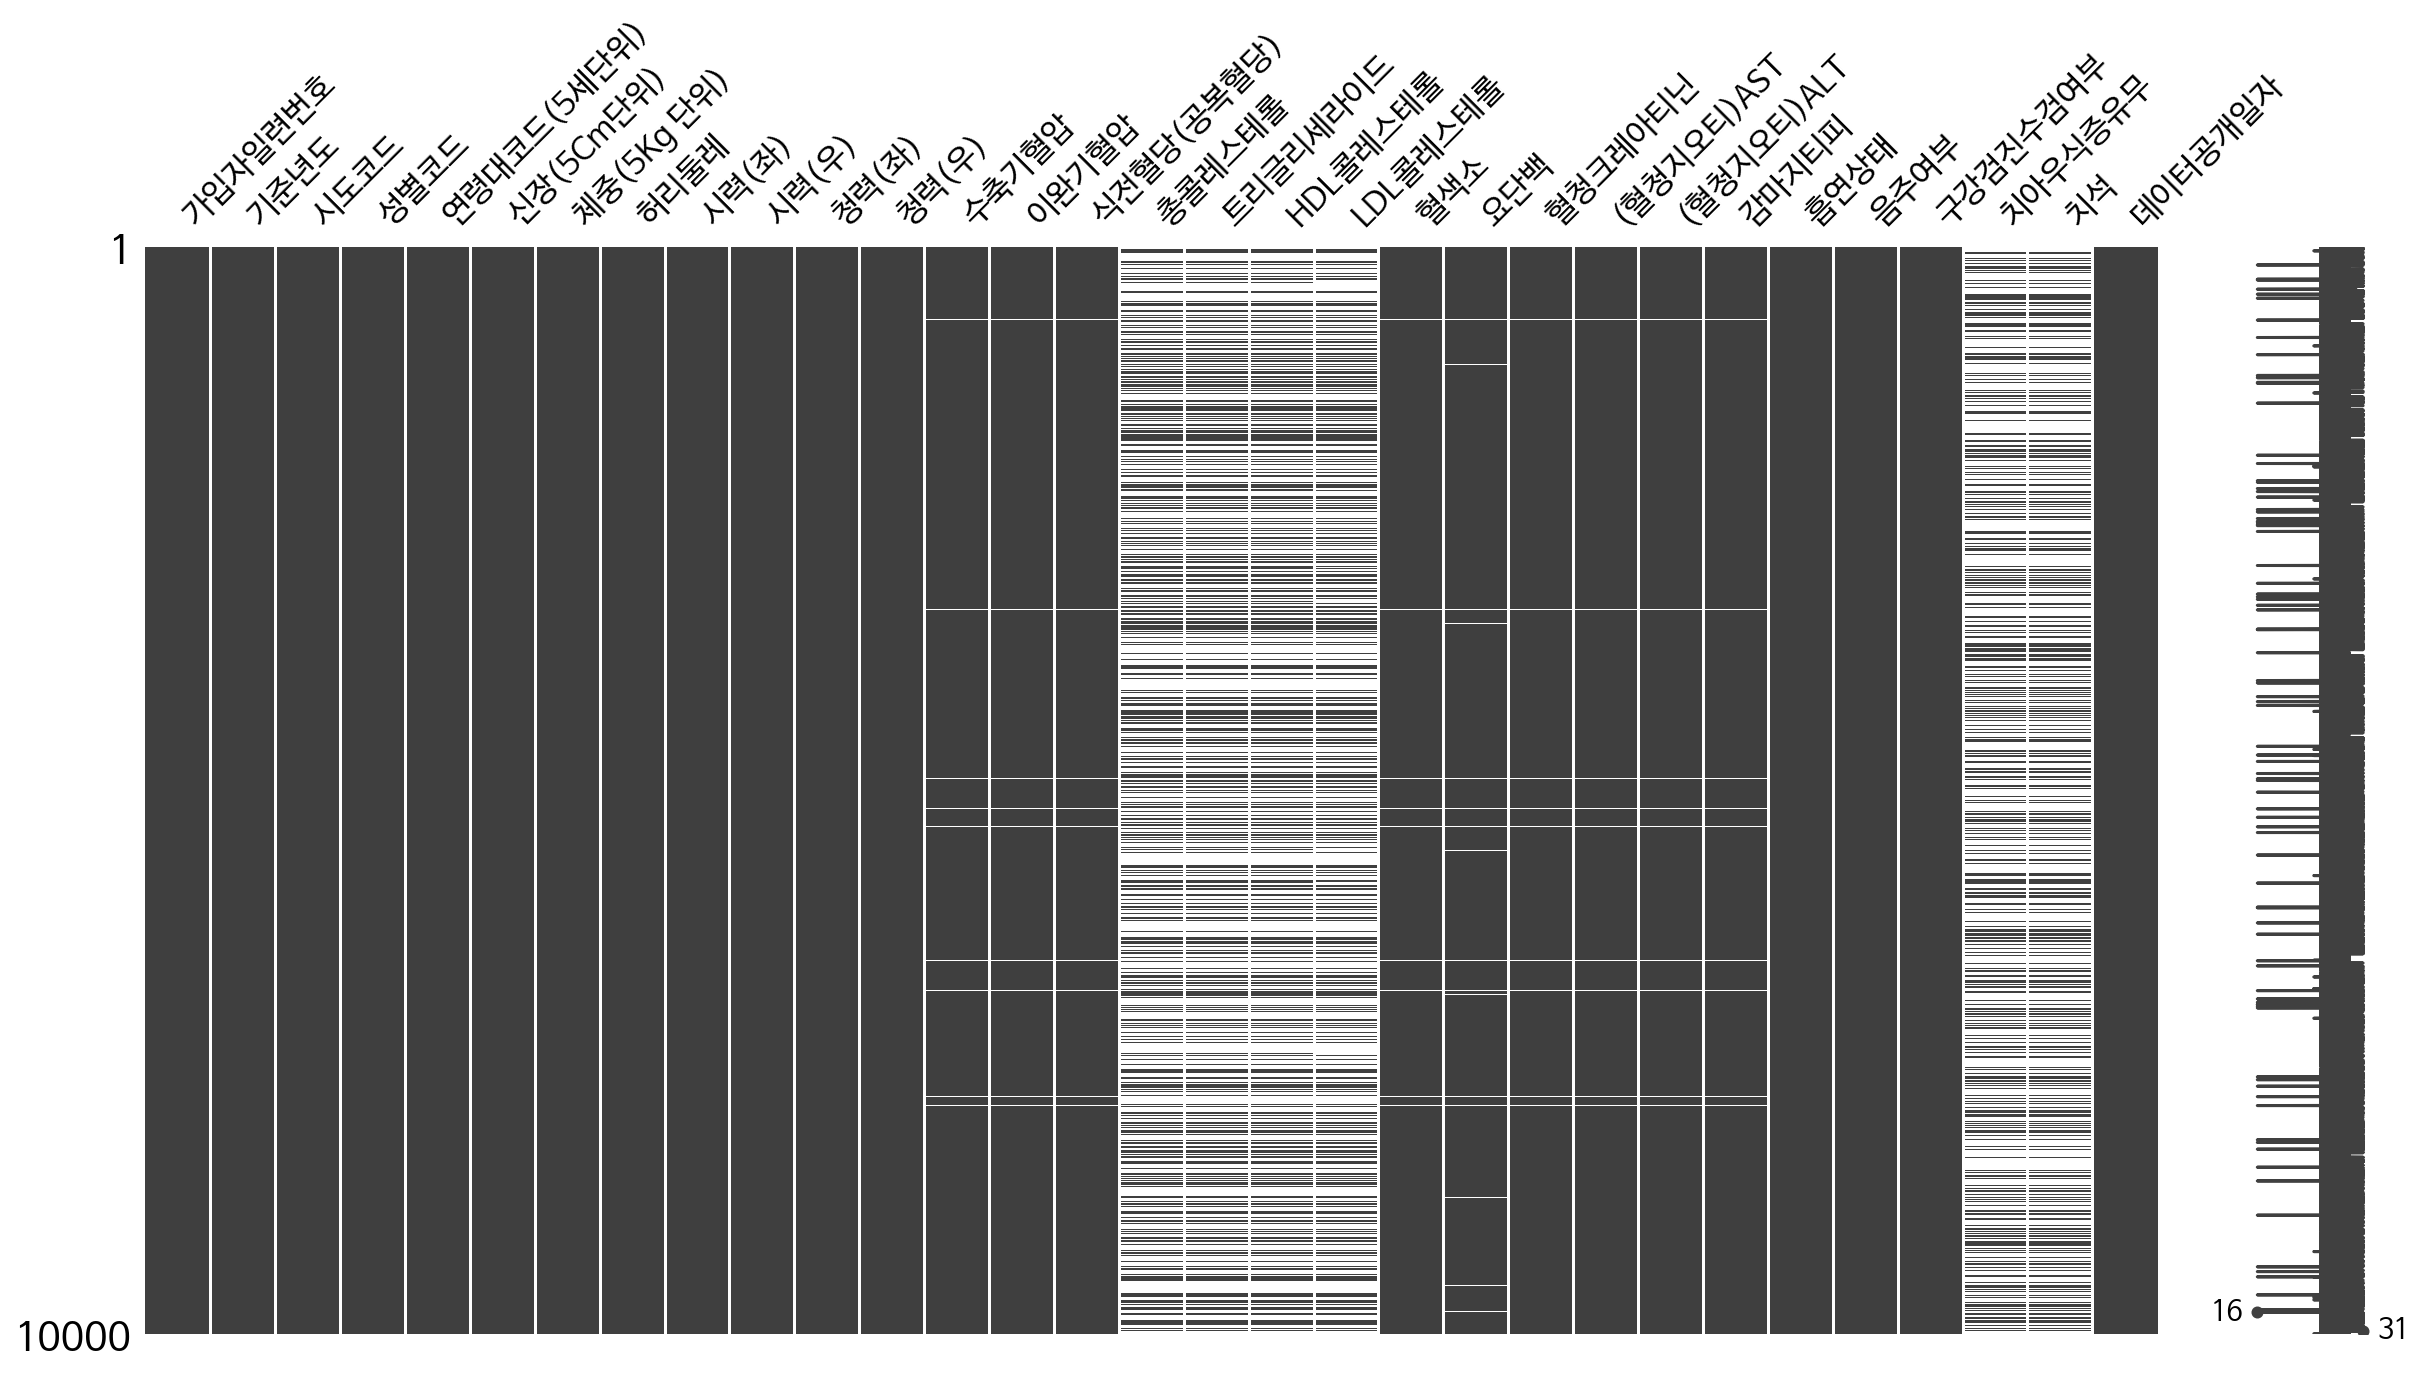

In [6]:
#결측치 시각화
import missingno as msno
import matplotlib as mat
#mat.rcParams['font.family'] = 'NanumSquare'

msno.matrix(df, figsize=(20,10))

In [7]:
#사용하지 않는 Column 삭제
df.drop(['가입자일련번호', '기준년도', '시도코드','시력(좌)','시력(우)','청력(좌)','청력(우)','구강검진수검여부','데이터공개일자','구강검진수검여부','치아우식증유무','치석'], axis=1 ,inplace=True)

In [8]:
#결측치 처리
df.dropna(axis='index',how='any',subset = ['음주여부','총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤','요단백'],inplace=True)

In [9]:
#범주형 데이터를 수치형으로 전처리
df_category = df.loc[:,'성별코드'] #1.카테고리 데이터와 일반 숫자 데이터 분리
df_dummy = pd.get_dummies(df_category, columns=['성별코드']) #2.범주형(카테고리) 필드 전처리

df_numeric = df.drop(columns = ['성별코드'])
df_numeric = pd.concat([df_numeric, df_dummy], axis = 1)

df_numeric = df_numeric.rename(columns={'F': '여성'})
df_numeric = df_numeric.rename(columns={'M': '남성'})

In [10]:
df_numeric['음주여부'].replace({'No':'0'},inplace=True)
df_numeric['음주여부'].replace({'Yes':'1'},inplace=True) # 음주여부 (Yes=1, No=0)

df_numeric['흡연상태'].replace({'NotNow' : '0'},inplace=True)
df_numeric['흡연상태'].replace({'No' : '0'},inplace=True)
df_numeric['흡연상태'].replace({'Yes':'1'},inplace=True) # 흡연상태 (Yes=1, No or 금연 =0)
df_numeric

,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,...,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,여성,남성
0,9,165,60,72.1,127.0,79.0,90.0,188.0,58.0,58.0,...,15.0,1.0,1.1,21.0,27.0,21.0,0,0,0,1
4,12,155,50,75.2,144.0,89.0,110.0,220.0,171.0,53.0,...,12.4,1.0,0.7,18.0,17.0,14.0,0,0,1,0
5,9,185,85,94.0,114.0,72.0,86.0,234.0,183.0,50.0,...,16.4,1.0,1.1,25.0,32.0,26.0,1,1,0,1
6,9,165,80,93.0,112.0,73.0,250.0,119.0,265.0,26.0,...,15.7,1.0,0.7,18.0,20.0,35.0,1,1,0,1
8,17,150,50,82.0,136.0,65.0,104.0,177.0,61.0,63.0,...,13.3,1.0,0.7,42.0,48.0,39.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,14,150,70,96.0,129.0,79.0,90.0,110.0,132.0,35.0,...,14.8,1.0,0.8,23.0,24.0,15.0,0,0,1,0
9989,16,145,70,94.0,132.0,82.0,93.0,172.0,104.0,65.0,...,13.5,1.0,0.7,19.0,15.0,11.0,0,0,1,0
9991,16,155,45,70.0,117.0,67.0,121.0,151.0,74.0,54.0,...,13.0,1.0,1.4,20.0,13.0,16.0,0,0,0,1
9994,17,150,55,95.0,120.0,66.0,115.0,188.0,125.0,53.0,...,15.7,1.0,1.1,22.0,21.0,18.0,0,0,0,1


#### 기준 설정

![[별표4의 별첨] 검사항목별 판정기준_0001.png](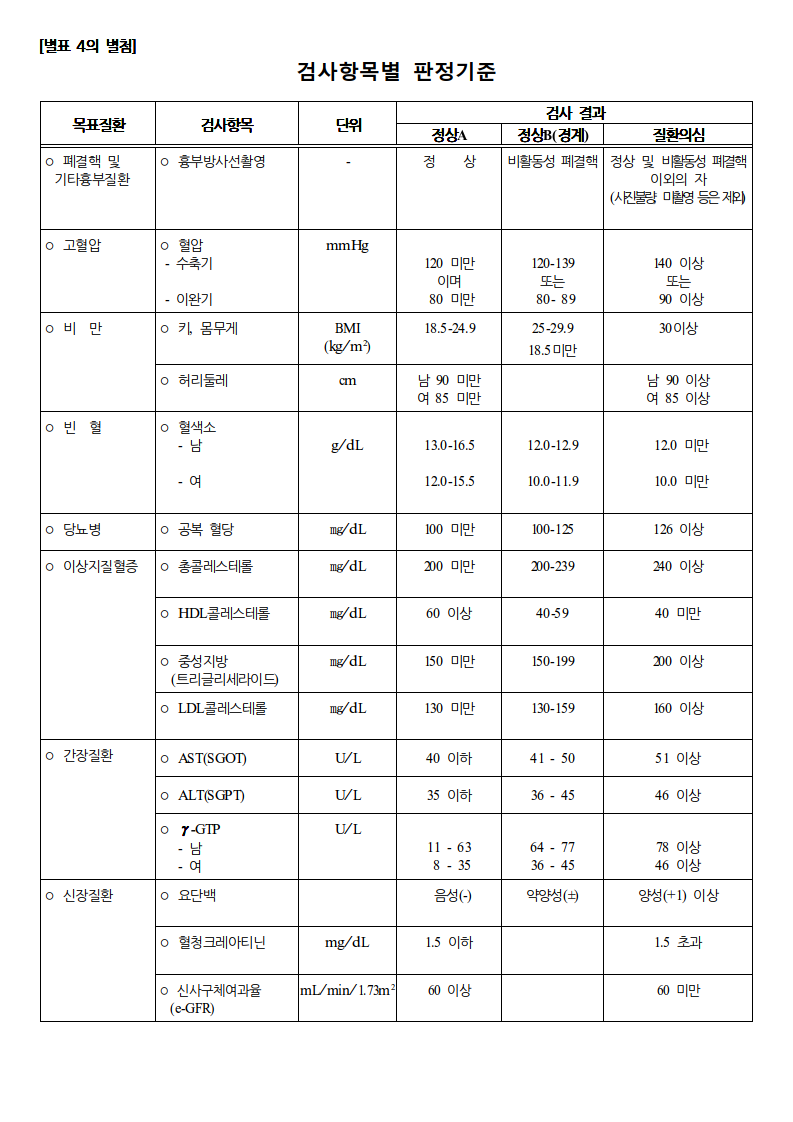)

In [11]:
#데이터 추가

# 1. 고혈압여부 추가
df_numeric.loc[(df_numeric['수축기혈압']>=140) | (df_numeric['이완기혈압']>=90),'고혈압여부'] = '1' # 3.고혈압여부 추가 (고혈압=1, 고혈압 아님=0)
df_numeric['고혈압여부'].fillna('0',inplace = True)

# 2-1.BMI지수 추가
df_numeric['BMI지수'] = df_numeric['체중(5Kg 단위)'] / (df_numeric['신장(5Cm단위)'] * df_numeric['신장(5Cm단위)'] /10000) 
df_numeric.drop(['체중(5Kg 단위)','신장(5Cm단위)'],axis=1,inplace=True)  #Column 삭제

# 2-2.비만여부 추가 (비만=1, 정상=0)
df_numeric.loc[df_numeric['BMI지수']>=25,'비만여부']='1' #비만(BMI)
df_numeric.loc[(df_numeric['여성']== '0') & (df_numeric['허리둘레']>=90), '비만여부'] = '1' #남성비만 (허리둘레)
df_numeric.loc[(df_numeric['여성']== '1') & (df_numeric['허리둘레']>=85), '비만여부'] = '1' #여성비만 (허리둘레)
df_numeric['비만여부'].fillna('0',inplace = True)

# 3. 빈혈여부 추가 (빈혈=1, 정상=0)
df_numeric.loc[(df_numeric['여성']== '0') & (df_numeric['혈색소']<12), '빈혈여부'] = '1' #남성빈혈
df_numeric.loc[(df_numeric['여성']== '1') & (df_numeric['혈색소']<10), '빈혈여부'] = '1' #여성빈혈
df_numeric['빈혈여부'].fillna('0',inplace = True)

# 4. 당뇨여부 추가 (당뇨=1, 정상=0)
df_numeric.loc[df_numeric['식전혈당(공복혈당)']>=126,'당뇨여부']='1' # 5.당뇨여부 추가 (당뇨(식전혈당 126이상)=1, 당뇨아님=0)
df_numeric['당뇨여부'].fillna('0',inplace = True)

# 4. 이상지질혈증 여부 추가 (이상=1, 정상=0)
df_numeric.loc[(df_numeric['총콜레스테롤']>= 240) | (df_numeric['HDL콜레스테롤']< 40) |(df_numeric['트리글리세라이드']>= 200) | (df_numeric['LDL콜레스테롤']>= 160), '이상지질혈증'] = '1'
df_numeric['이상지질혈증'].fillna('0',inplace = True)

# 5. 간장질환 여부 추가 (이상=1, 정상=0)
df_numeric.loc[(df_numeric['(혈청지오티)AST']>= 51) | (df_numeric['(혈청지오티)ALT']>= 46), '간장질환'] = '1'
df_numeric.loc[(df_numeric['여성']== '0') & (df_numeric['감마지티피']>=78), '간장질환'] = '1' #남성 감마지티피 이상
df_numeric.loc[(df_numeric['여성']== '1') & (df_numeric['감마지티피']>=46), '간장질환'] = '1' #여성 감마지티피 이상
df_numeric['간장질환'].fillna('0',inplace = True)

# 6. 신장질환 여부 추가 (이상=1, 정상=0)
df_numeric.loc[(df_numeric['요단백']>= 1) | (df_numeric['혈청크레아티닌']> 1.5) , '신장질환'] = '1'
df_numeric['신장질환'].fillna('0',inplace = True)

df_numeric

,연령대코드(5세단위),허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,...,여성,남성,고혈압여부,BMI지수,비만여부,빈혈여부,당뇨여부,이상지질혈증,간장질환,신장질환
0,9,72.1,127.0,79.0,90.0,188.0,58.0,58.0,118.0,15.0,...,0,1,0,22.038567,0,0,0,0,0,1
4,12,75.2,144.0,89.0,110.0,220.0,171.0,53.0,133.0,12.4,...,1,0,1,20.811655,0,0,0,0,0,1
5,9,94.0,114.0,72.0,86.0,234.0,183.0,50.0,147.0,16.4,...,0,1,0,24.835646,0,0,0,0,0,1
6,9,93.0,112.0,73.0,250.0,119.0,265.0,26.0,40.0,15.7,...,0,1,0,29.384757,1,0,1,1,0,1
8,17,82.0,136.0,65.0,104.0,177.0,61.0,63.0,101.0,13.3,...,1,0,0,22.222222,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,14,96.0,129.0,79.0,90.0,110.0,132.0,35.0,49.0,14.8,...,1,0,0,31.111111,1,0,0,1,0,1
9989,16,94.0,132.0,82.0,93.0,172.0,104.0,65.0,86.0,13.5,...,1,0,0,33.293698,1,0,0,0,0,1
9991,16,70.0,117.0,67.0,121.0,151.0,74.0,54.0,82.0,13.0,...,0,1,0,18.730489,0,0,0,0,0,1
9994,17,95.0,120.0,66.0,115.0,188.0,125.0,53.0,110.0,15.7,...,0,1,0,24.444444,0,0,0,0,0,1


In [12]:
#Column 정리
df_numeric = df_numeric[['연령대코드(5세단위)','남성','여성','고혈압여부','비만여부','빈혈여부','당뇨여부','이상지질혈증','간장질환','음주여부','흡연상태','신장질환','수축기혈압','이완기혈압','BMI지수','허리둘레','혈색소','식전혈당(공복혈당)','총콜레스테롤','트리글리세라이드','HDL콜레스테롤','LDL콜레스테롤','(혈청지오티)AST','(혈청지오티)ALT','감마지티피','혈청크레아티닌','요단백']]
df_numeric = df_numeric.round(1)
df_numeric

,연령대코드(5세단위),남성,여성,고혈압여부,비만여부,빈혈여부,당뇨여부,이상지질혈증,간장질환,음주여부,...,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,혈청크레아티닌,요단백
0,9,1,0,0,0,0,0,0,0,0,...,90.0,188.0,58.0,58.0,118.0,21.0,27.0,21.0,1.1,1.0
4,12,0,1,1,0,0,0,0,0,0,...,110.0,220.0,171.0,53.0,133.0,18.0,17.0,14.0,0.7,1.0
5,9,1,0,0,0,0,0,0,0,1,...,86.0,234.0,183.0,50.0,147.0,25.0,32.0,26.0,1.1,1.0
6,9,1,0,0,1,0,1,1,0,1,...,250.0,119.0,265.0,26.0,40.0,18.0,20.0,35.0,0.7,1.0
8,17,0,1,0,0,0,0,0,1,0,...,104.0,177.0,61.0,63.0,101.0,42.0,48.0,39.0,0.7,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,14,0,1,0,1,0,0,1,0,0,...,90.0,110.0,132.0,35.0,49.0,23.0,24.0,15.0,0.8,1.0
9989,16,0,1,0,1,0,0,0,0,0,...,93.0,172.0,104.0,65.0,86.0,19.0,15.0,11.0,0.7,1.0
9991,16,1,0,0,0,0,0,0,0,0,...,121.0,151.0,74.0,54.0,82.0,20.0,13.0,16.0,1.4,1.0
9994,17,1,0,0,0,0,0,0,0,0,...,115.0,188.0,125.0,53.0,110.0,22.0,21.0,18.0,1.1,1.0


# **분류 문제 선정**
건강검진 정보(독립변수)를 활용하여 흡연 상태(종속변수)를 예측하도록 한다. 건강검진 센터에서 흡연 여부를 응답하지 않는 사람이 있다면, 검진 데이터를 바탕으로 예측할 수 있을 것이다.


**X(독립변수) = '음주여부','수축기혈압','이완기혈압','BMI지수','허리둘레','혈색소','식전혈당(공복혈당)','총콜레스테롤','트리글리세라이드','HDL콜레스테롤','LDL콜레스테롤','(혈청지오티)AST','(혈청지오티)ALT','감마지티피','혈청크레아티닌','요단백'**


**y(종속변수) = '흡연상태'**

# **데이터 분석**

### 1. 간 기능 지표 분석

### 산점도행렬

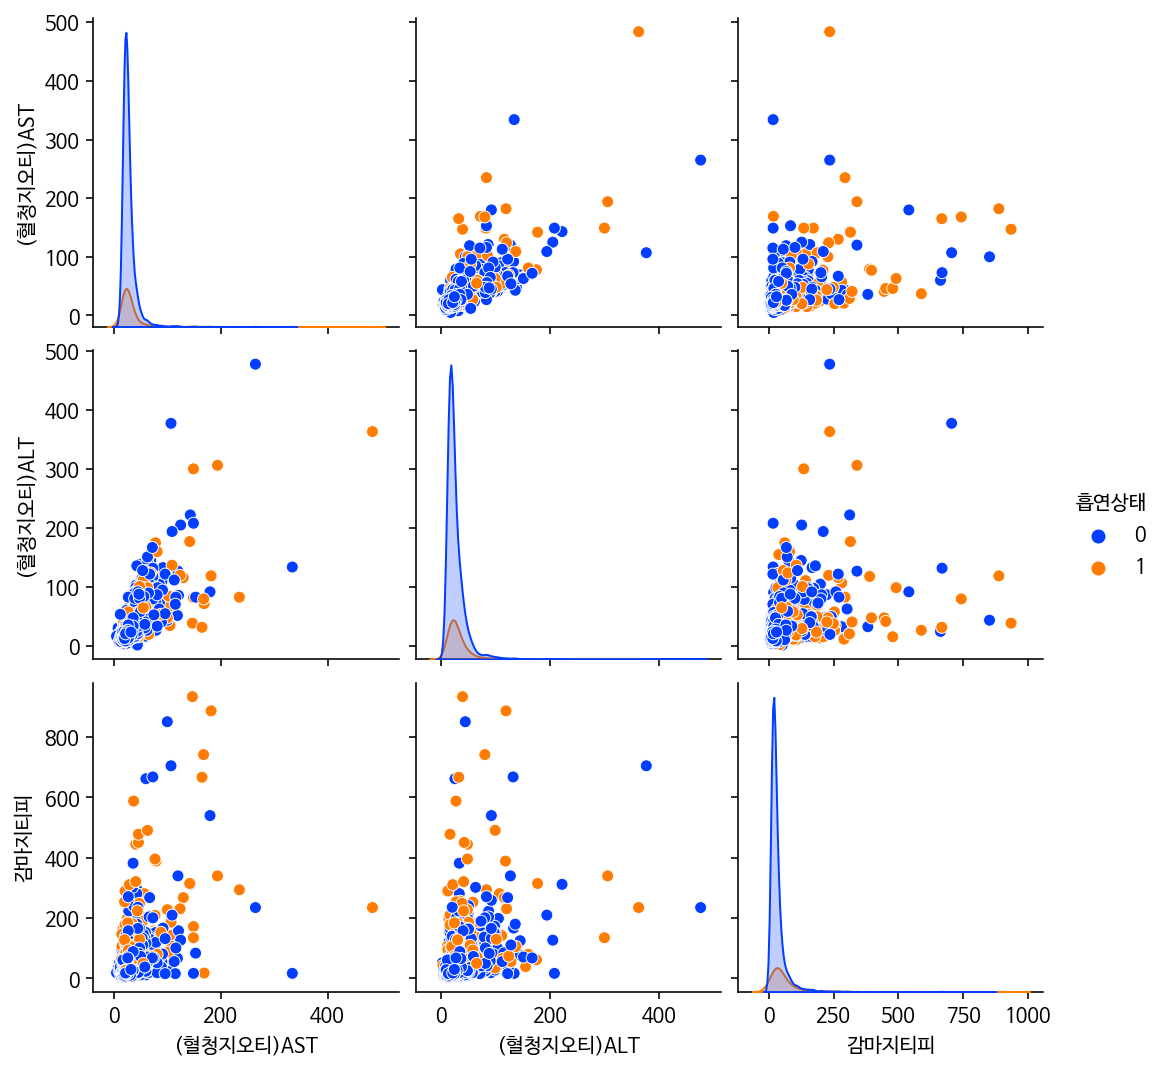

In [13]:
sns.pairplot(df_numeric[['(혈청지오티)AST','(혈청지오티)ALT','감마지티피','흡연상태']], 
             diag_kind='kde',
             hue='흡연상태', palette='bright')

plt.show()

### 상관계수

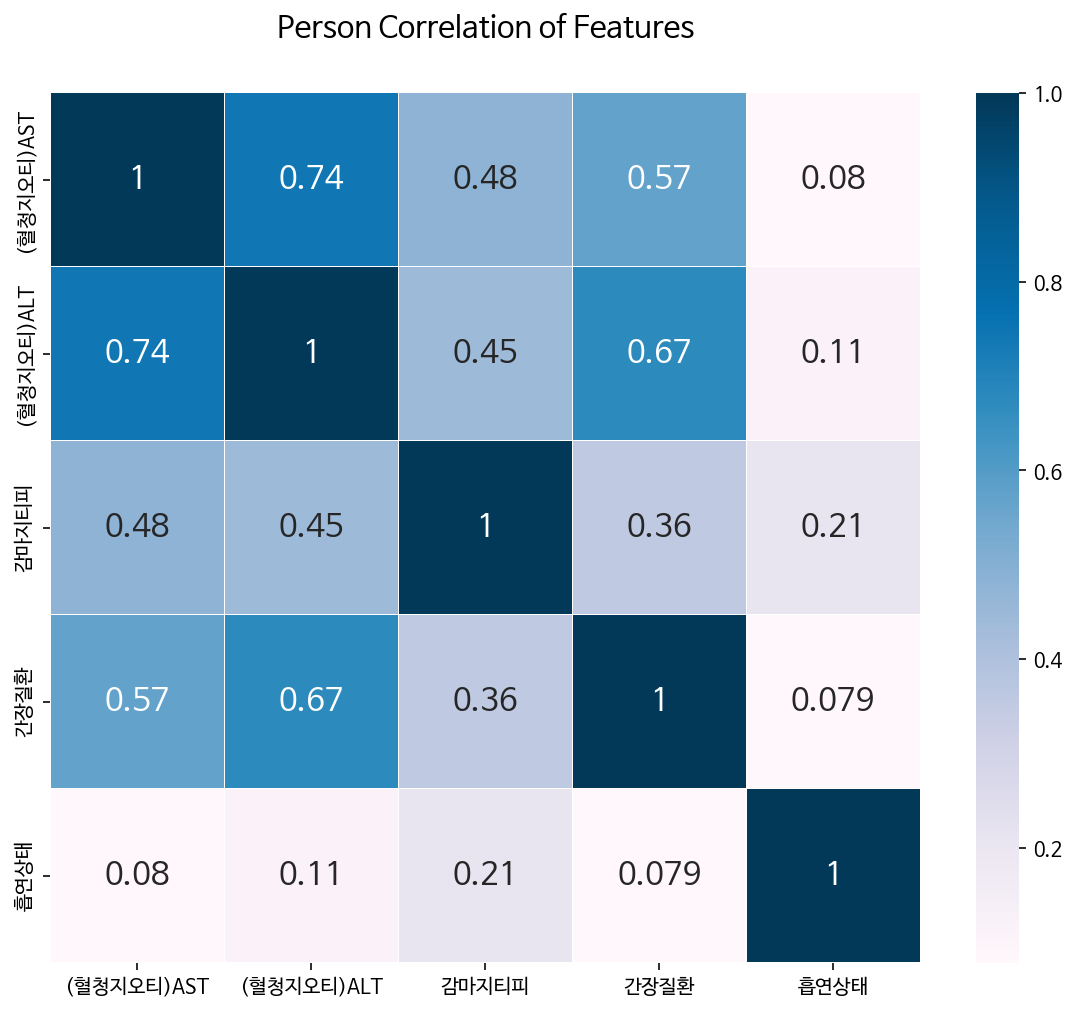

In [14]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("Person Correlation of Features", y = 1.05, size = 15)
sns.heatmap(df_numeric[['(혈청지오티)AST','(혈청지오티)ALT','감마지티피','간장질환','흡연상태']].astype(float).corr(), linewidths = 0.1, vmax = 1.0,
            square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

### 정리
1. 흡연자 집단은 AST, ALT, 감마지티피수치가 비흡연자 집단에 비해 높게 나타난다.
2. AST, ALT, 감마지티피 사이에서는 유의미한 양의 상관관계가 나타난다.

### 2. 이상지질혈증 관련 지표 분석

### 산점도행렬

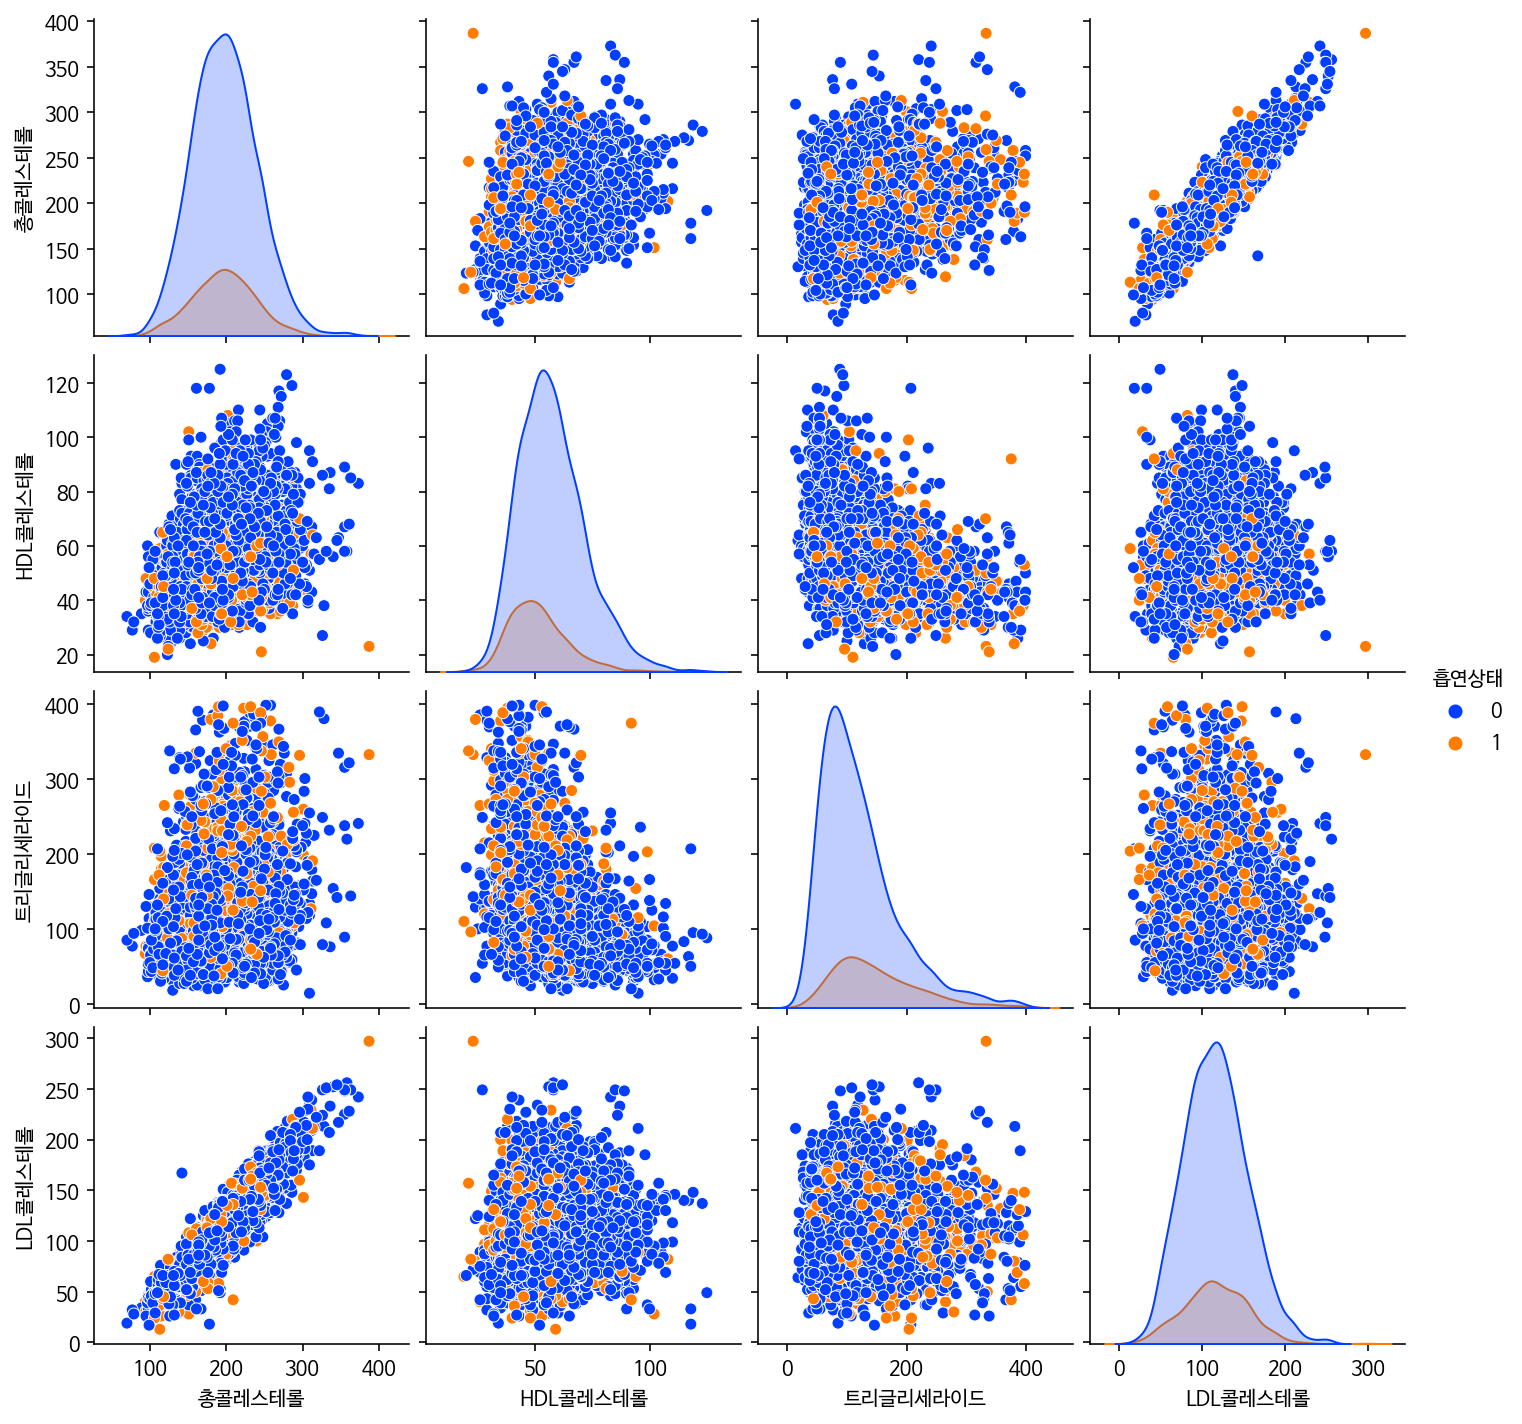

In [15]:
sns.pairplot(df_numeric[['총콜레스테롤', 'HDL콜레스테롤', '트리글리세라이드', 'LDL콜레스테롤','흡연상태']], 
             diag_kind='kde',
             hue='흡연상태', palette='bright')

plt.show()

###상관계수

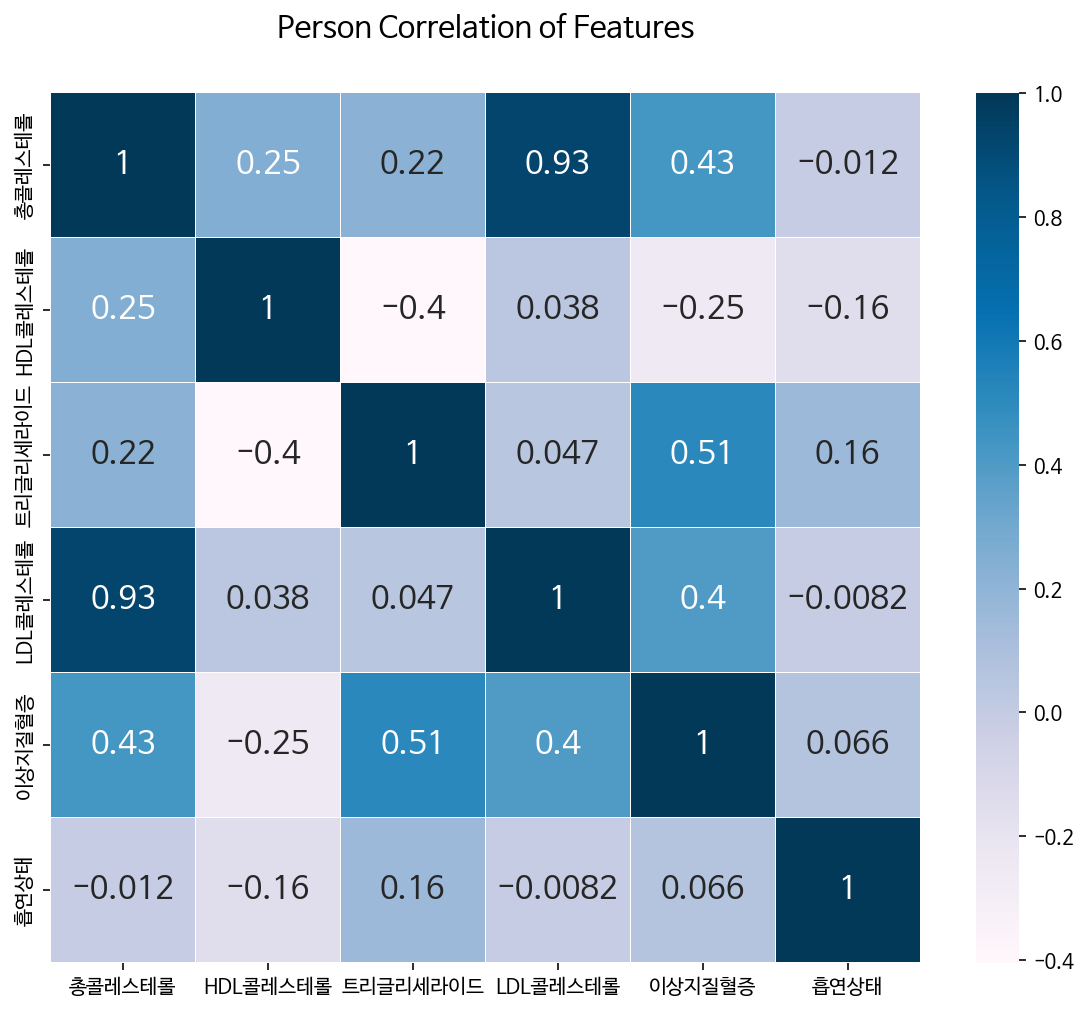

In [16]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("Person Correlation of Features", y = 1.05, size = 15)
sns.heatmap(df_numeric[['총콜레스테롤', 'HDL콜레스테롤', '트리글리세라이드', 'LDL콜레스테롤','이상지질혈증','흡연상태']].astype(float).corr(), linewidths = 0.1, vmax = 1.0,
            square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

### 정리
1. 흡연자 집단은 비흡연자 집단에 비해 트리글리세라이드 수치는 높고 HDL콜레스테롤 수치는 낮다. 즉 신체에 악영향을 주는 지질의 수치는 높고 긍정적 영향을 주는 지질의 수치는 낮다는 것이다.
2. AST, ALT, 감마지티피 사이에서는 유의미한 양의 상관관계가 나타난다.

### 3. 요단백 관련 지표 분석
( 요단백과 관련있는 데이터는 혈색소, 요단백 수치, 혈청 크레아티닌. 혈색소는 혈액 속 단백질이고 혈청 크레아티닌은 단백질 대사의 산물으로 단백질의 대사가 얼마나 원활히 이루어지는지를 알 수 있는 척도 )

### 산점도행렬

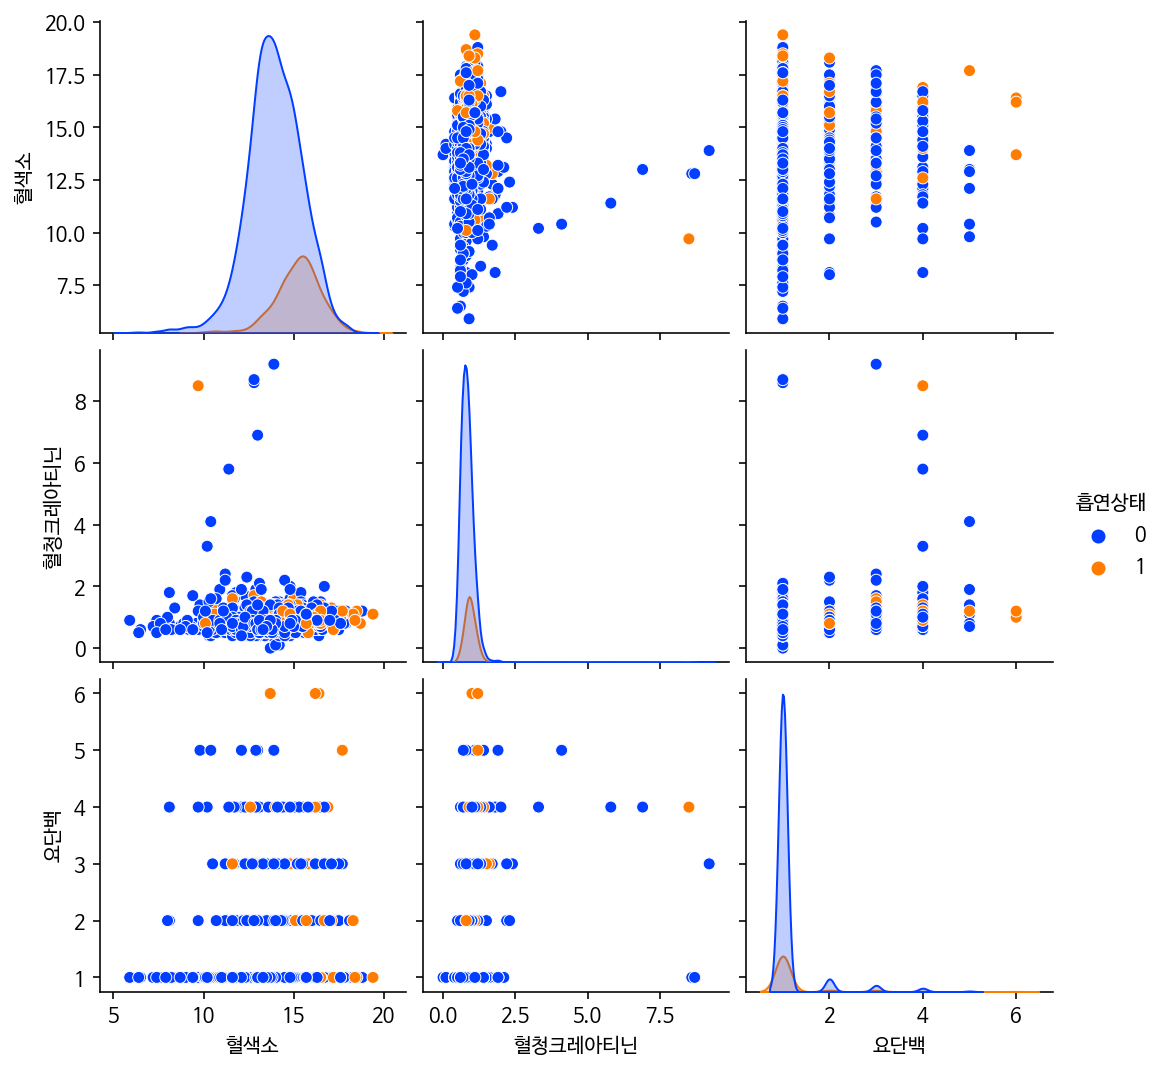

In [17]:
sns.pairplot(df_numeric[['혈색소', '혈청크레아티닌', '요단백','흡연상태']], 
             diag_kind='kde',
             hue='흡연상태', palette='bright')

plt.show()

### 상관계수

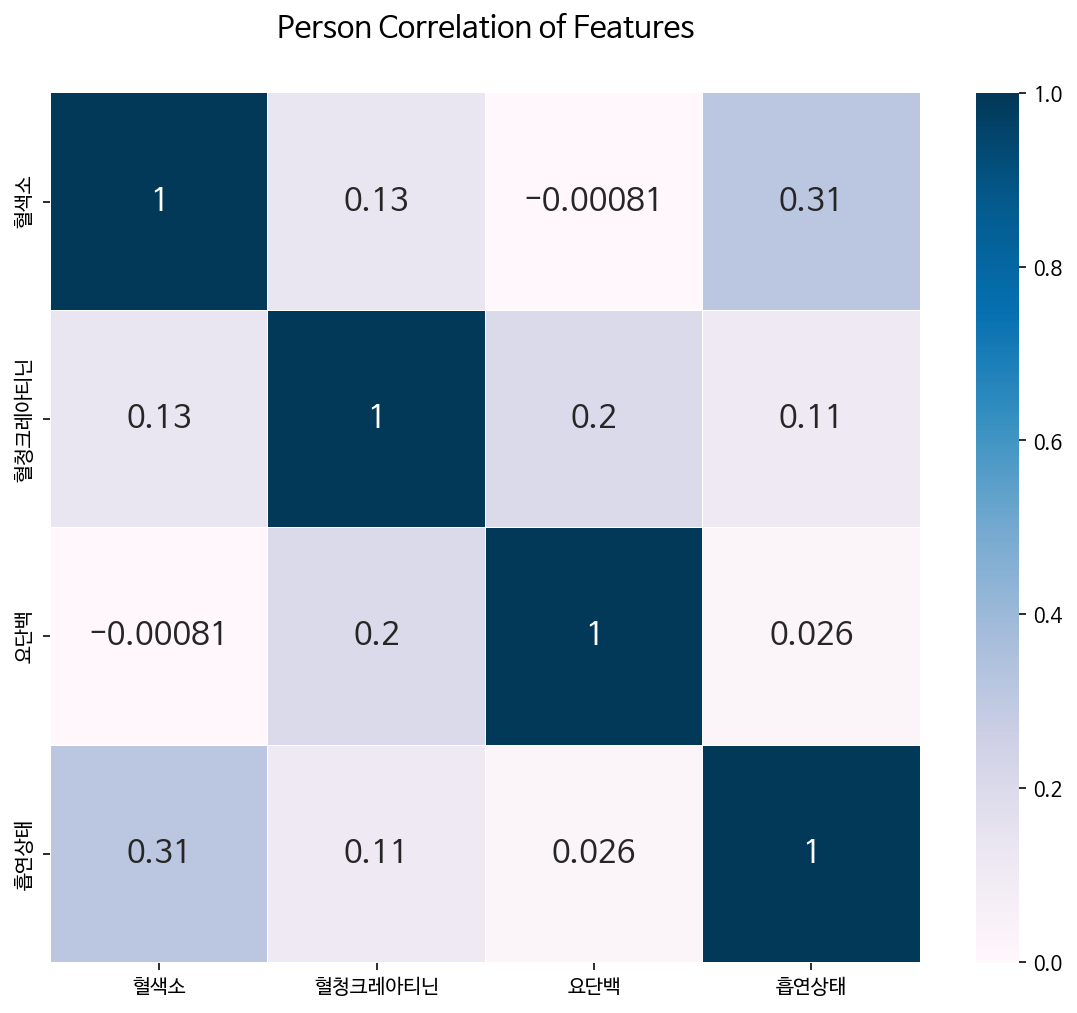

In [18]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("Person Correlation of Features", y = 1.05, size = 15)
sns.heatmap(df_numeric[['혈색소', '혈청크레아티닌', '요단백','흡연상태']].astype(float).corr(), linewidths = 0.1, vmax = 1.0,
            square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

### 정리
1. 요단백 수치와 흡연 유무는 거의 관련이 없다.
2. 흡연자는 혈색소와 혈청크레아티닌 수치가 높게 유지된다고 볼 수는 있다.

#**가설 설정**
흡연상태에 가장 큰 영향을 미치는 중요변수는 상관계수에서 가장 큰 상관도를 보인 혈색소일 것이다.

# **최적의 분류 모델 선택-Training and Test**

In [19]:
#데이터셋
from sklearn.model_selection import train_test_split

X = df_numeric[['음주여부','수축기혈압','이완기혈압','BMI지수','허리둘레','혈색소','식전혈당(공복혈당)','총콜레스테롤','트리글리세라이드','HDL콜레스테롤','LDL콜레스테롤','(혈청지오티)AST','(혈청지오티)ALT','감마지티피','혈청크레아티닌','요단백']]
y = df_numeric[['흡연상태']]

X_train, X_test, y_train, y_test = train_test_split (X,y,stratify=y,test_size=0.2, train_size=0.8, random_state=42)

### 1. 의사결정나무

In [20]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=11, random_state=42)
model

DecisionTreeClassifier(max_depth=11, random_state=42)

In [21]:
#학습
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=11, random_state=42)

In [22]:
#예측을 하고 결과를 y_predict에 담음
y_predict = model.predict(X_test)
y_predict

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1',
       '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '0',
       '0', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '1', '0',
       '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0',
       '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0',
       '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1',
       '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0',
       '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0',
       '1', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0',
       '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0

In [23]:
#accuracy score
from sklearn.metrics import accuracy_score
print('정확도:',accuracy_score(y_test, y_predict) * 100)

정확도: 78.00252844500632


In [24]:
#최적의 max_depth 값 찾기
from pandas.errors import AccessorRegistrationWarning
for max_depth in range(3,15):
  model = DecisionTreeClassifier(max_depth=11, random_state=42)
  y_predict = model.fit(X_train, y_train).predict(X_test)
  score = accuracy_score(y_test, y_predict) * 100
  print(max_depth, score)

3 78.00252844500632
4 78.00252844500632
5 78.00252844500632
6 78.00252844500632
7 78.00252844500632
8 78.00252844500632
9 78.00252844500632
10 78.00252844500632
11 78.00252844500632
12 78.00252844500632
13 78.00252844500632
14 78.00252844500632


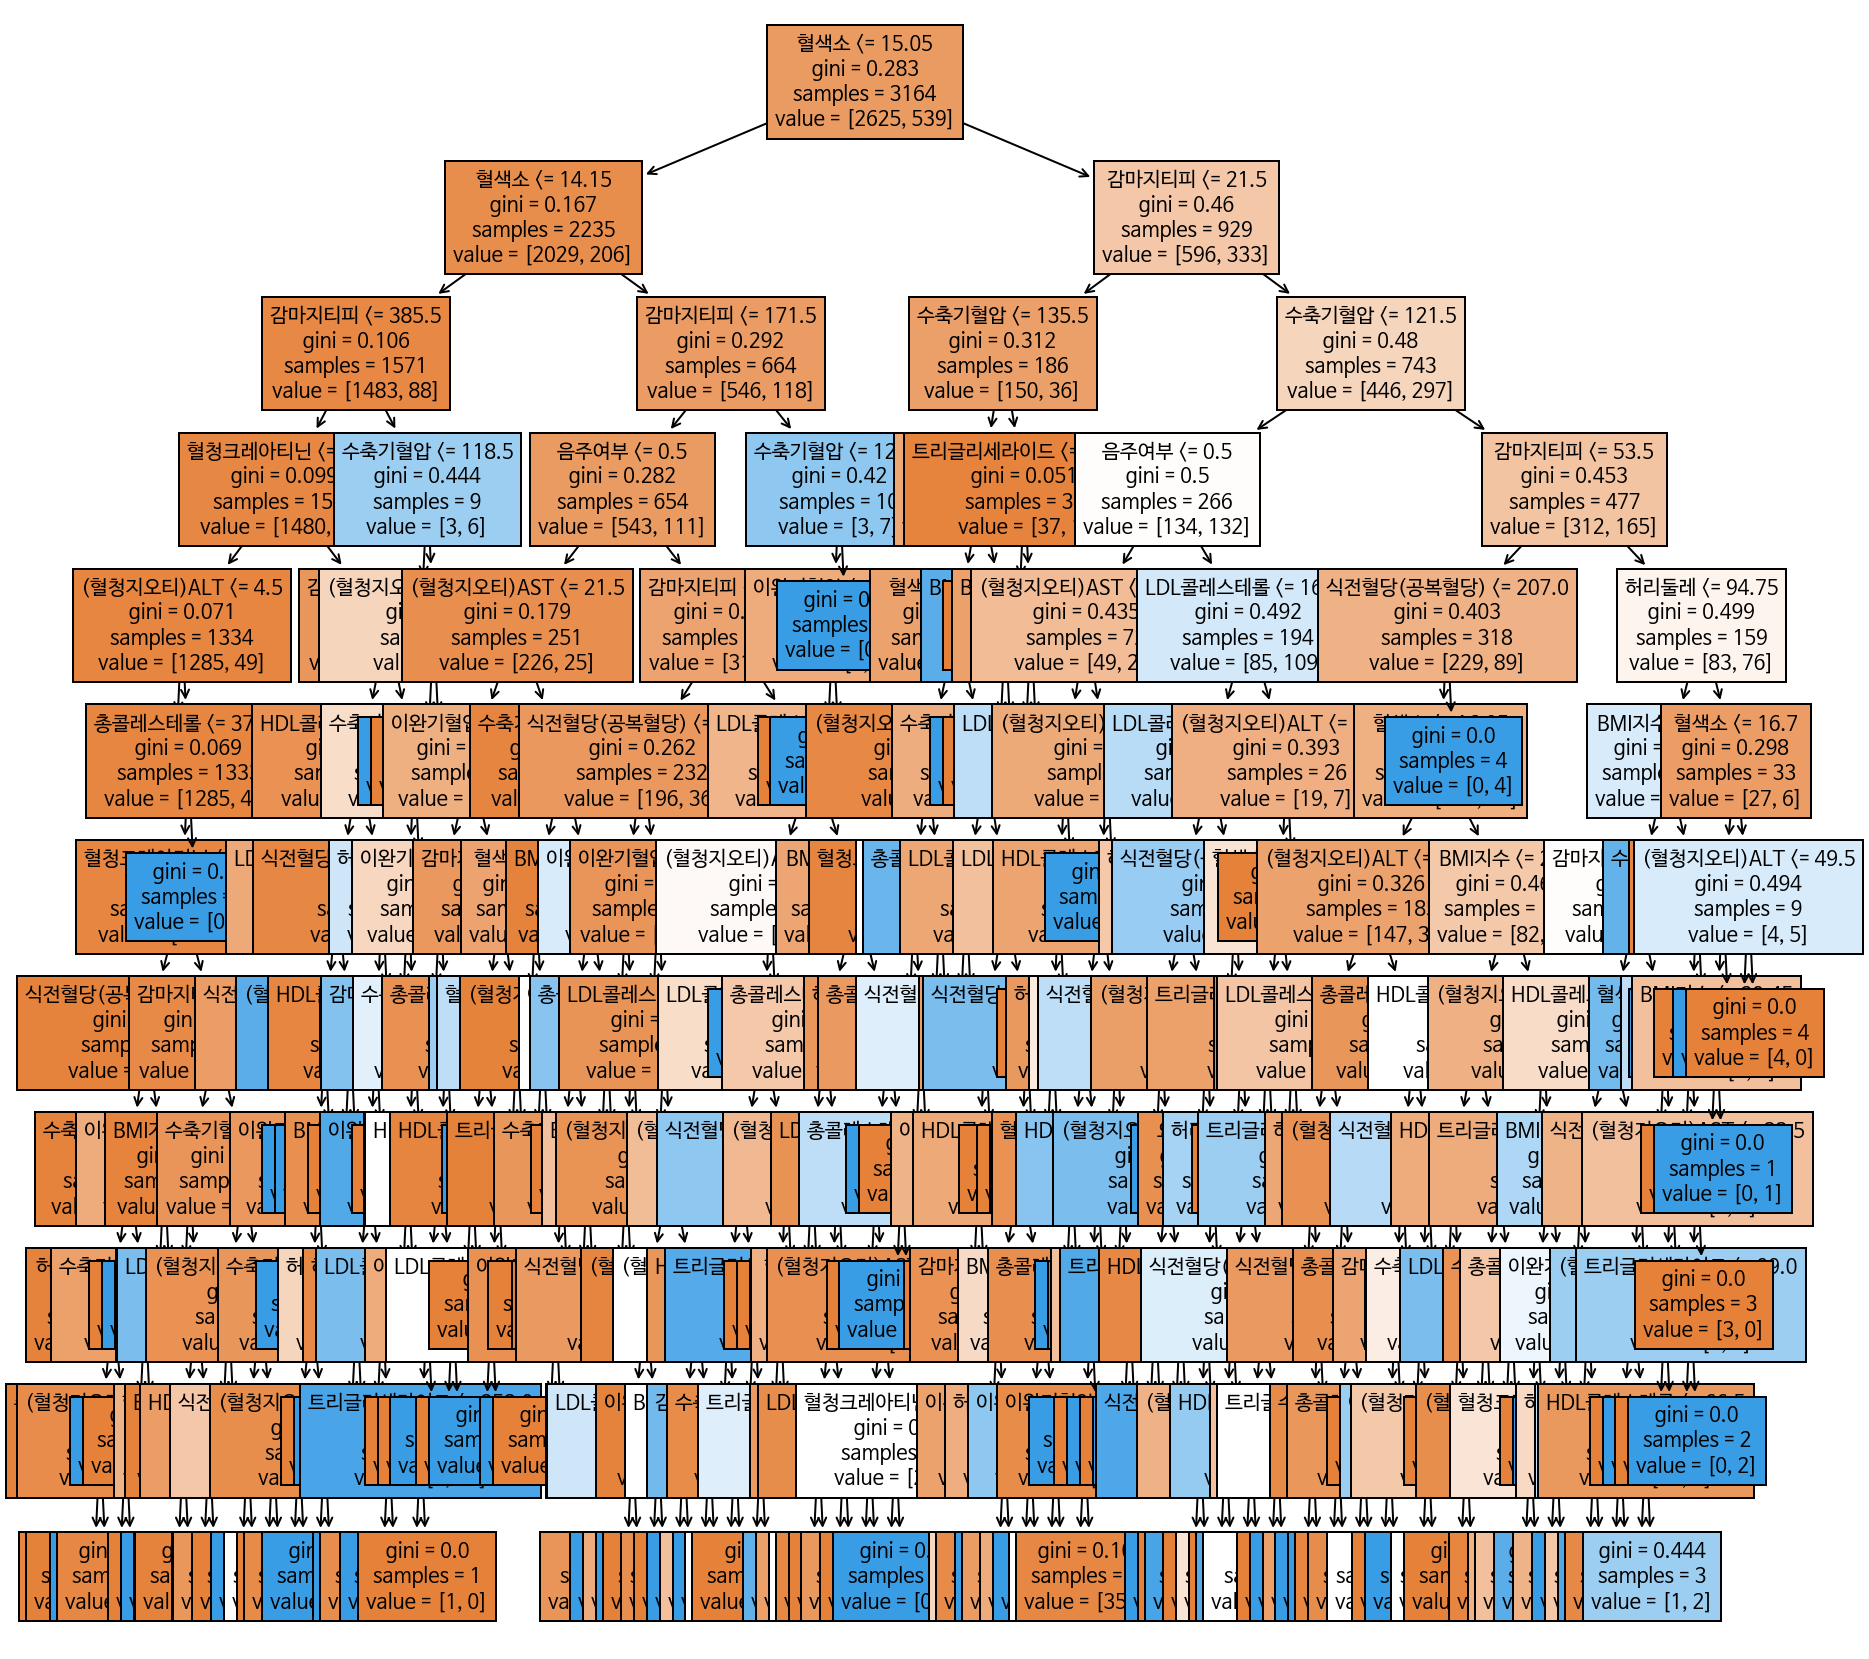

In [25]:
#시각화
from sklearn.tree import plot_tree
feature_names = X_train.columns.tolist()

plt.figure(figsize=(15, 15))
tree = plot_tree(model, feature_names=feature_names, fontsize=10, filled=True)

### 2. Grid Search

In [26]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier(random_state=42)
param_grid = {"max_depth": range(3, 12), 
              "max_features": [0.3, 0.5, 0.7, 0.9, 1]}
clf = GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=5, verbose=2)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(3, 12),
                         'max_features': [0.3, 0.5, 0.7, 0.9, 1]},
             verbose=2)

In [27]:
clf.best_params_

{'max_depth': 3, 'max_features': 1}

In [28]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=3, max_features=1, random_state=42)

In [29]:
clf.best_score_

0.8302782610434539

In [30]:
pd.DataFrame(clf.cv_results_).sort_values(by="rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,0.014398,0.001203,0.005301,0.000158,3,1,"{'max_depth': 3, 'max_features': 1}",0.832543,0.832543,0.824645,0.830964,0.830696,0.830278,0.002920,1
0,0.016492,0.000742,0.005419,0.000264,3,0.3,"{'max_depth': 3, 'max_features': 0.3}",0.829384,0.829384,0.829384,0.829384,0.830696,0.829646,0.000525,2
1,0.019530,0.002486,0.007260,0.002620,3,0.5,"{'max_depth': 3, 'max_features': 0.5}",0.827804,0.829384,0.829384,0.829384,0.830696,0.829330,0.000917,3
9,0.014762,0.001775,0.005272,0.000181,4,1,"{'max_depth': 4, 'max_features': 1}",0.824645,0.829384,0.824645,0.829384,0.833861,0.828384,0.003463,4
19,0.014752,0.000793,0.005576,0.000851,6,1,"{'max_depth': 6, 'max_features': 1}",0.824645,0.842022,0.823065,0.823065,0.825949,0.827749,0.007218,5


In [31]:
clf.predict(X_test)

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1

In [32]:
clf.score(X_test, y_test)

0.8242730720606827

###3. Random Search

In [33]:
max_depth = np.random.randint(4, 20, 10)
max_depth
 
max_features = np.random.uniform(0.8, 1.0, 100)
 
param_distributions = {"max_depth" :max_depth,
           "max_features": max_features,
           "min_samples_split" : list(range(2, 7))
           }
param_distributions

{'max_depth': array([ 7,  6, 11, 11, 15,  6,  4, 14,  7,  8]),
 'max_features': array([0.93079564, 0.91787045, 0.940519  , 0.83713592, 0.99080556,
        0.91835534, 0.94357066, 0.91267067, 0.86772464, 0.88840024,
        0.93192055, 0.89643683, 0.91490992, 0.94766513, 0.91618245,
        0.81284979, 0.93334731, 0.84427592, 0.91742117, 0.94546399,
        0.83611258, 0.96000071, 0.93120884, 0.99058721, 0.8756908 ,
        0.82084583, 0.9578707 , 0.98274589, 0.89642101, 0.95415469,
        0.89994162, 0.82647582, 0.82357893, 0.88529056, 0.9559993 ,
        0.81779503, 0.98740461, 0.98067375, 0.94616472, 0.83439317,
        0.88596272, 0.87545331, 0.96573067, 0.84985885, 0.85636042,
        0.84467423, 0.9304179 , 0.87905455, 0.87695158, 0.83731623,
        0.93322981, 0.84068649, 0.98627427, 0.88455429, 0.96540507,
        0.84361271, 0.95270531, 0.88204689, 0.81304985, 0.99997407,
        0.97654257, 0.96886006, 0.93151973, 0.92677342, 0.9766779 ,
        0.82032917, 0.86825253, 0.988

In [34]:
from sklearn.model_selection import RandomizedSearchCV

clf = RandomizedSearchCV(model,
    param_distributions,
    n_iter=1000,
    scoring="accuracy",
    n_jobs=-1,
    cv=5,
    random_state=42
    )

clf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'max_depth': array([ 7,  6, 11, 11, 15,  6,  4, 14,  7,  8]),
                                        'max_features': array([0.93079564, 0.91787045, 0.940519  , 0.83713592, 0.99080556,
       0.91835534, 0.94357066, 0.91267067, 0.86772464, 0.88840024,
       0.93192055, 0.89643683, 0.91490992, 0.94766513, 0.91618245,
       0.8...
       0.83997501, 0.84207413, 0.90264924, 0.90451493, 0.8880886 ,
       0.96753849, 0.94761904, 0.98309579, 0.85531996, 0.82476135,
       0.96410288, 0.84028235, 0.93767215, 0.98175877, 0.94231435,
       0.93764658, 0.96983801, 0.88082842, 0.98859506, 0.97674509,
       0.80463401, 0.80391742, 0.86038773, 0.86458766, 0.8233537 ,
       0.96280049, 0.87036742, 0.96217734, 0.91328208, 0.84457675]),
                                        'min_samples_split': [2, 3, 4, 5, 6]},
                   random

In [35]:
clf.best_params_

{'min_samples_split': 3, 'max_features': 0.8039174156655546, 'max_depth': 4}

In [36]:
clf.best_score_

0.825538424620553

In [37]:
clf.score(X_test, y_test)

0.8280657395701644

In [38]:
pd.DataFrame(clf.cv_results_).sort_values(by="rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
483,0.022304,0.002601,0.005427,0.000426,4,0.811292,4,"{'min_samples_split': 4, 'max_features': 0.811...",0.829384,0.837283,0.819905,0.812006,0.829114,0.825538,0.008722,1
97,0.021927,0.000954,0.005557,0.000116,3,0.803917,4,"{'min_samples_split': 3, 'max_features': 0.803...",0.829384,0.837283,0.819905,0.812006,0.829114,0.825538,0.008722,1
675,0.024262,0.003353,0.005369,0.000028,4,0.837316,4,"{'min_samples_split': 4, 'max_features': 0.837...",0.832543,0.834123,0.821485,0.810427,0.827532,0.825222,0.008614,3
797,0.024096,0.003289,0.005476,0.000196,6,0.840282,4,"{'min_samples_split': 6, 'max_features': 0.840...",0.832543,0.834123,0.821485,0.810427,0.827532,0.825222,0.008614,3
365,0.022947,0.002829,0.005484,0.000360,2,0.867725,4,"{'min_samples_split': 2, 'max_features': 0.867...",0.832543,0.834123,0.821485,0.810427,0.827532,0.825222,0.008614,3


## 4. Random Forest

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state=42)
model

GradientBoostingClassifier(random_state=42)

In [40]:
#학습
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [41]:
#예측
y_predict = model.predict(X_test)
y_predict[:5]

array(['0', '0', '0', '0', '0'], dtype=object)

In [42]:
#점수
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.8331226295828066

In [43]:
model.feature_importances_

array([0.05001544, 0.05781132, 0.01969653, 0.04487964, 0.02115356,
       0.34713762, 0.04168625, 0.01448724, 0.0274542 , 0.04946675,
       0.0120178 , 0.06035506, 0.0394891 , 0.17004201, 0.03604484,
       0.00826264])

## **적절한 평가 방법 선택**
의사결정나무 : 78.00252844500632

그리드 서치 : 0.8242730720606827

랜덤 서치 : 0.8280657395701644

**랜덤 포레스트: 0.8331226295828066**




의사결정나무를 제외한 모든 방법이 0.82 ~ 0.83으로 비슷한 정확도를 보였으나, 랜덤 포레스트가 0.833으로 가장 높은 정확도를 보였다.

랜덤 포레스트는 의사결정나무 모델 여러 개를 훈련시켜 그 결과를 종합해 예측하기 때문에 높은 성능이 나온 것이 아닐까 예측한다.

#**분류 모델을 통한 인사이트 도출**

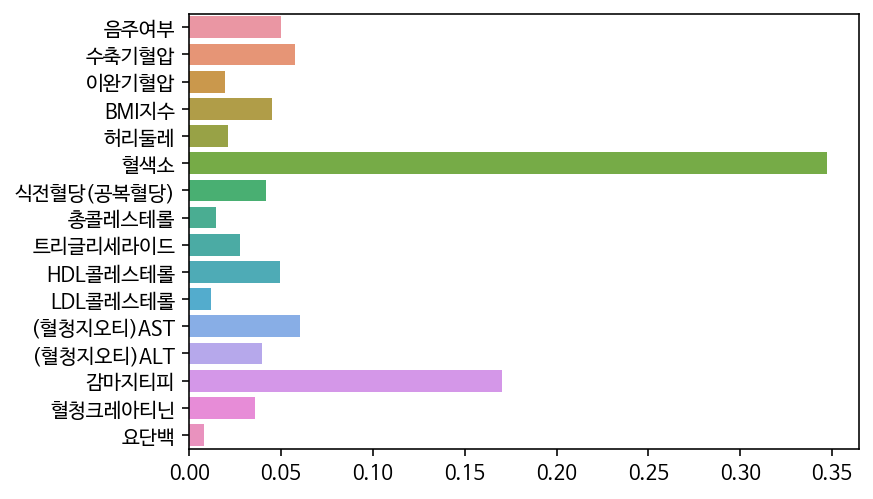

In [45]:
#feature별 중요도 계산 (중요변수)
feature_names = X_train.columns.tolist()
 
sns.barplot(x=model.feature_importances_, y=feature_names)

가설과 마찬가지로 흡연상태에 가장 큰 영향을 미치는 중요변수는 혈색소였다.
중요 변수 확인 이후 30~50대 성인 남성을 대상으로 한 연구를 확인해보니, 혈색소와 흡연은 연관이 있어 빈혈 진단에 흡연 유무를 고려해야할 것이라 주장하는 내용을 알 수 있었다. (특히 흡연량이 많은 사람의 경우 빈혈 진단에 큰 수치 변화가 있었음.)

의외의 결과였던 것은 혈색소 다음 유의미한 중요변수가 감마지티피라는 것이었다. 본인은 가설 설정 후 데이터 분석에 감마지티피를 간 기능과 관련된 지표로 분류하였다. 자료 조사를 해보니, 혈중 감마지티피 상승의 원인은 단순히 알코올 섭취와 간세포 손상의 지표로만은 볼 수 없으며, 흡연, 고지혈증, 당뇨, 고혈압 등 다양한 요인들에 의해 영향을 받는다는 사실을 알게 되었다.

마지막으로 가장 어려움을 겪었던 부분은, 독립변수 중 성별(여성) Column이 가장 높은 중요도가 나왔다. 여성 흡연자 비율이 높다는 이유만으로 중요도가 높게 나올리 없는데, 도저히 이유를 찾을 수 없어 Column을 삭제하였다. 건강검진 센터에서 검진 데이터를 바탕으로 흡연 여부를 예측할 때 성별은 크게 중요하지 않을 것이라 생각했기 때문이다.